In [1]:
def f(x):
    return x**2

print(f(3))

9


In [2]:
def dfdx(x):
    return 2*x

print(dfdx(3))

6


In [3]:
import numpy as np

x_array = np.array([1, 2, 3])

print("x: \n", x_array)
print("f(x) = x**2: \n", f(x_array))
print("f'(x) = 2x: \n", dfdx(x_array))

x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]
f'(x) = 2x: 
 [2 4 6]


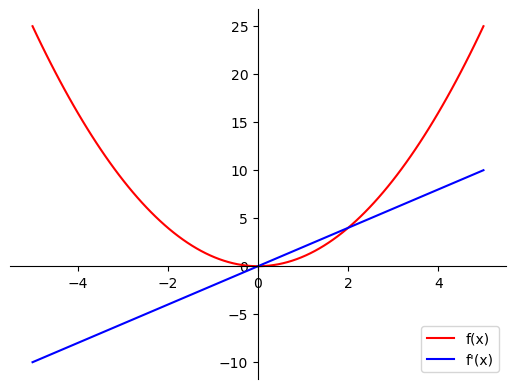

In [4]:
import matplotlib.pyplot as plt

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline

def plot_f1_and_f2(f1, f2=None, x_min=-5, x_max=5, label1="f(x)", label2="f'(x)"):
    x = np.linspace(x_min, x_max,100)

    # Setting the axes at the centre.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, f1(x), 'r', label=label1)
    if not f2 is None:
        # If f2 is an array, it is passed as it is to be plotted as unlinked points.
        # If f2 is a function, f2(x) needs to be passed to plot it.        
        if isinstance(f2, np.ndarray):
            plt.plot(x, f2, 'bo', markersize=3, label=label2,)
        else:
            plt.plot(x, f2(x), 'b', label=label2)
    plt.legend()

    plt.show()
    
plot_f1_and_f2(f, dfdx)

In [5]:
import math

math.sqrt(18)

4.242640687119285

In [7]:
# This format of module import allows to use the sympy functions without sympy. prefix.
from sympy import *

# This is actually sympy.sqrt function, but sympy. prefix is omitted.
sqrt(18)

3*sqrt(2)

In [8]:
N(sqrt(18),8)

4.2426407

In [9]:
# List of symbols.
x, y = symbols('x y')
# Definition of the expression.
expr = 2 * x**2 - x * y
expr

2*x**2 - x*y

In [10]:
expr_manip = x * (expr + x * y + x**3)
expr_manip

x*(x**3 + 2*x**2)

In [11]:
expand(expr_manip)

x**4 + 2*x**3

In [12]:
factor(expr_manip)

x**3*(x + 2)

In [13]:
expr.evalf(subs={x:-1, y:2})

4.00000000000000

In [14]:
f_symb = x ** 2
f_symb.evalf(subs={x:3})

9.00000000000000

In [15]:
print(x_array)

[1 2 3]


In [16]:
#Now try to evaluate function `f_symb` for each element of the array. You will get an error:
try:
    f_symb(x_array)
except TypeError as err:
    print(err)

'Pow' object is not callable


It is possible to evaluate the symbolic functions for each element of the array, but you need to make a function `NumPy`-friendly first:

In [17]:
from sympy.utilities.lambdify import lambdify

f_symb_numpy = lambdify(x, f_symb, 'numpy')

In [18]:
print("x: \n", x_array)
print("f(x) = x**2: \n", f_symb_numpy(x_array))

x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]


<a name='2.2'></a>
### 2.2 - Symbolic Differentiation with `SymPy`

Let's try to find a derivative of a simple power function using `SymPy`:

In [19]:
diff(x**3,x)

3*x**2

In [20]:
dfdx_composed = diff(exp(-2*x) + 3*sin(3*x), x)
dfdx_composed

9*cos(3*x) - 2*exp(-2*x)

In [21]:
dfdx_symb = diff(f_symb, x)
dfdx_symb_numpy = lambdify(x, dfdx_symb, 'numpy')

In [22]:
print("x: \n", x_array)
print("f'(x) = 2x: \n", dfdx_symb_numpy(x_array))

x: 
 [1 2 3]
f'(x) = 2x: 
 [2 4 6]


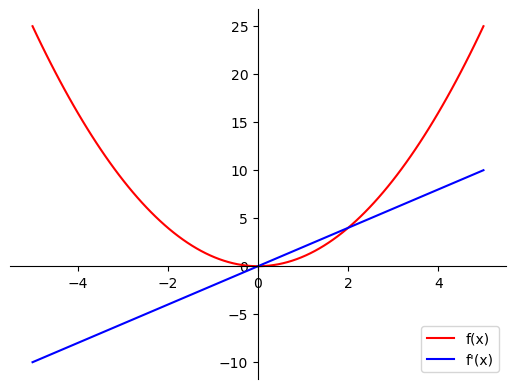

In [23]:
plot_f1_and_f2(f_symb_numpy, dfdx_symb_numpy)

<a name='2.3'></a>
### 2.3 - Limitations of Symbolic Differentiation

Symbolic Differentiation seems to be a great tool. But it also has some limitations. Sometimes the output expressions are too complicated and even not possible to evaluate. For example, find the derivative of the function $$\left|x\right| = \begin{cases} x, \ \text{if}\ x > 0\\  -x, \ \text{if}\ x < 0 \\ 0, \ \text{if}\ x = 0\end{cases}$$ Analytically, its derivative is:
$$\frac{d}{dx}\left(\left|x\right|\right) = \begin{cases} 1, \ \text{if}\ x > 0\\  -1, \ \text{if}\ x < 0\\\ \text{does not exist}, \ \text{if}\ x = 0\end{cases}$$

Have a look the output from the symbolic differentiation:

In [24]:
dfdx_abs = diff(abs(x),x)
dfdx_abs

(re(x)*Derivative(re(x), x) + im(x)*Derivative(im(x), x))*sign(x)/x

In [25]:
dfdx_abs.evalf(subs={x:-2})

-Subs(Derivative(re(x), x), x, -2)

In [26]:
dfdx_abs_numpy = lambdify(x, dfdx_abs,'numpy')

try:
    dfdx_abs_numpy(np.array([1, -2, 0]))
except NameError as err:
    print(err)

PrintMethodNotImplementedError: Unsupported by <class 'sympy.printing.numpy.NumPyPrinter'>: <class 'sympy.core.function.Derivative'>
Printer has no method: _print_Derivative_re
Set the printer option 'strict' to False in order to generate partially printed code.

<a name='3'></a>
## 3 - Numerical Differentiation

This method does not take into account the function expression. The only important thing is that the function can be evaluated in the nearby points $x$ and $x+\Delta x$, where $\Delta x$ is sufficiently small. Then $\frac{df}{dx}\approx\frac{f\left(x + \Delta x\right) - f\left(x\right)}{\Delta x}$, which can be called a **numerical approximation** of the derivative. 

Based on that idea there are different approaches for the numerical approximations, which somehow vary in the computation speed and accuracy. However, for all of the methods the results are not accurate - there is a round off error. At this stage there is no need to go into details of various methods, it is enough to investigate one of the numerial differentiation functions, available in `NumPy` package.

You can call function `np.gradient` to find the derivative of function $f\left(x\right) = x^2$ defined above. The first argument is an array of function values, the second defines the spacing $\Delta x$ for the evaluation. Here pass it as an array of $x$ values, the differences will be calculated automatically. You can find the documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html).

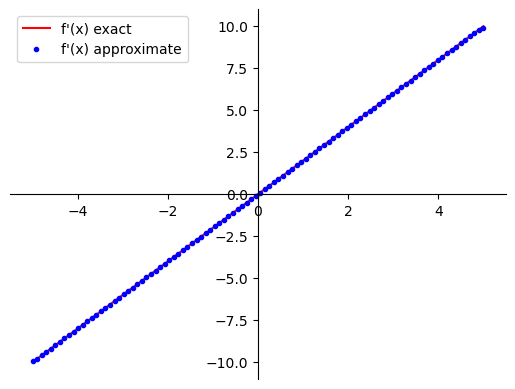

In [28]:
x_array_2 = np.linspace(-5, 5, 100)
dfdx_numerical = np.gradient(f(x_array_2), x_array_2)

plot_f1_and_f2(dfdx_symb_numpy, dfdx_numerical, label1="f'(x) exact", label2="f'(x) approximate")

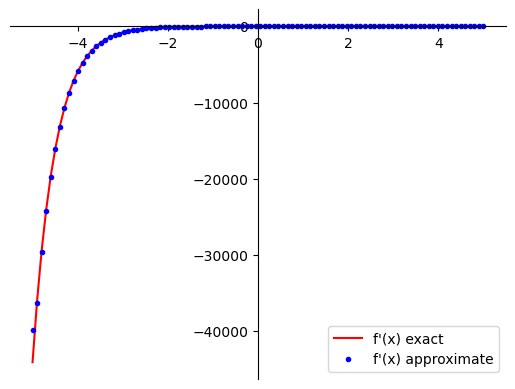

In [29]:
def f_composed(x):
    return np.exp(-2*x) + 3*np.sin(3*x)

plot_f1_and_f2(lambdify(x, dfdx_composed, 'numpy'), np.gradient(f_composed(x_array_2), x_array_2),
              label1="f'(x) exact", label2="f'(x) approximate")

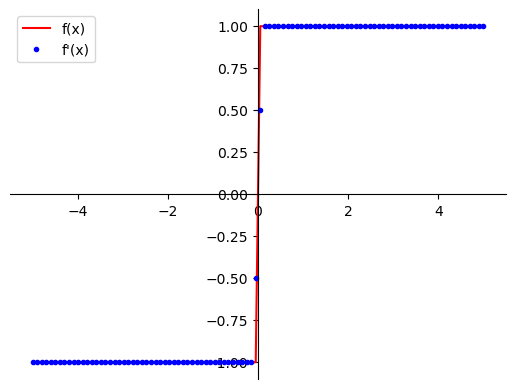

In [30]:
def dfdx_abs(x):
    if x > 0:
        return 1
    else:
        if x < 0:
            return -1
        else:
            return None

plot_f1_and_f2(np.vectorize(dfdx_abs), np.gradient(abs(x_array_2), x_array_2))